# Linear Regression on Used Cars Kaggle Dataset

Link: https://www.kaggle.com/jpayne/852k-used-car-listings

## Importing relevant libraries

In [105]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [106]:
raw_data = pd.read_csv('true_car_listings.csv')
raw_data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


## Preprocessing 

### Exploring the descriptive statistics of the variables

In [107]:
raw_data.describe(include='all')

,Price,Year,Mileage,City,State,Vin,Make,Model
count,852122.000000,852122.000000,8.521220e+05,852122,852122,852122,852122,852122
unique,NaN,NaN,NaN,2553,59,852075,58,2736
top,NaN,NaN,NaN,Houston,TX,1G1125S39EU113487,Ford,Silverado
freq,NaN,NaN,NaN,12703,94654,2,110432,24932
mean,21464.100210,2013.289145,5.250779e+04,NaN,NaN,NaN,NaN,NaN
std,13596.202241,3.414987,4.198896e+04,NaN,NaN,NaN,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,13000.000000,2012.000000,2.383600e+04,NaN,NaN,NaN,NaN,NaN
50%,18500.000000,2014.000000,4.025600e+04,NaN,NaN,NaN,NaN,NaN
75%,26995.000000,2016.000000,7.218600e+04,NaN,NaN,NaN,NaN,NaN


### Determining the variables of interest

In [108]:
data = raw_data.drop(['Vin', 'Model'], axis = 1)
data.describe(include='all')

,Price,Year,Mileage,City,State,Make
count,852122.000000,852122.000000,8.521220e+05,852122,852122,852122
unique,NaN,NaN,NaN,2553,59,58
top,NaN,NaN,NaN,Houston,TX,Ford
freq,NaN,NaN,NaN,12703,94654,110432
mean,21464.100210,2013.289145,5.250779e+04,NaN,NaN,NaN
std,13596.202241,3.414987,4.198896e+04,NaN,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN,NaN
25%,13000.000000,2012.000000,2.383600e+04,NaN,NaN,NaN
50%,18500.000000,2014.000000,4.025600e+04,NaN,NaN,NaN
75%,26995.000000,2016.000000,7.218600e+04,NaN,NaN,NaN


### Finding missing values

In [109]:
data.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Make       0
dtype: int64

In [110]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include='all')

,Price,Year,Mileage,City,State,Make
count,852122.000000,852122.000000,8.521220e+05,852122,852122,852122
unique,NaN,NaN,NaN,2553,59,58
top,NaN,NaN,NaN,Houston,TX,Ford
freq,NaN,NaN,NaN,12703,94654,110432
mean,21464.100210,2013.289145,5.250779e+04,NaN,NaN,NaN
std,13596.202241,3.414987,4.198896e+04,NaN,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN,NaN
25%,13000.000000,2012.000000,2.383600e+04,NaN,NaN,NaN
50%,18500.000000,2014.000000,4.025600e+04,NaN,NaN,NaN
75%,26995.000000,2016.000000,7.218600e+04,NaN,NaN,NaN


### Exploring the distributions

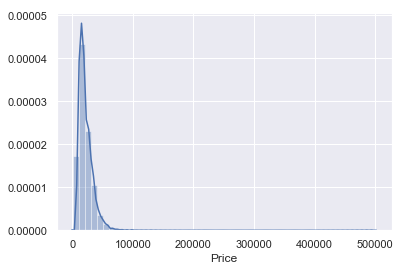

In [111]:
sns.distplot(data_no_mv['Price'])

### Dealing with Outliers

In [112]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Price,Year,Mileage,City,State,Make
count,843596.000000,843596.000000,8.435960e+05,843596,843596,843596
unique,NaN,NaN,NaN,2553,59,53
top,NaN,NaN,NaN,Houston,TX,Ford
freq,NaN,NaN,NaN,12509,93240,110033
mean,20750.210679,2013.271919,5.287130e+04,NaN,NaN,NaN
std,10580.679287,3.417316,4.199372e+04,NaN,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN,NaN
25%,12999.000000,2012.000000,2.417100e+04,NaN,NaN,NaN
50%,18421.000000,2014.000000,4.056500e+04,NaN,NaN,NaN
75%,26900.000000,2016.000000,7.264825e+04,NaN,NaN,NaN


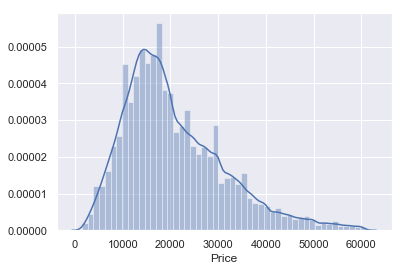

In [113]:
sns.distplot(data_1['Price'])

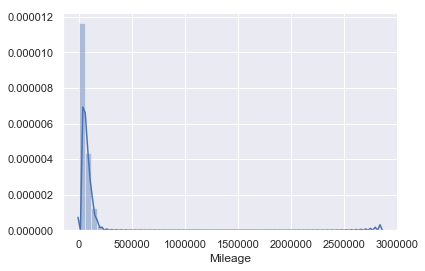

In [114]:
sns.distplot(data_no_mv['Mileage'])

In [115]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe(include='all')

,Price,Year,Mileage,City,State,Make
count,835160.000000,835160.000000,835160.000000,835160,835160,835160
unique,NaN,NaN,NaN,2553,59,53
top,NaN,NaN,NaN,Houston,TX,Ford
freq,NaN,NaN,NaN,12400,92321,108381
mean,20881.008274,2013.357749,51129.520849,NaN,NaN,NaN
std,10539.176456,3.305913,37535.970965,NaN,NaN,NaN
min,1500.000000,1997.000000,5.000000,NaN,NaN,NaN
25%,13287.000000,2012.000000,24009.000000,NaN,NaN,NaN
50%,18499.000000,2014.000000,40214.000000,NaN,NaN,NaN
75%,26977.000000,2016.000000,71263.000000,NaN,NaN,NaN


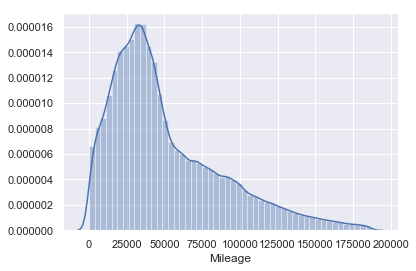

In [116]:
sns.distplot(data_2['Mileage'])

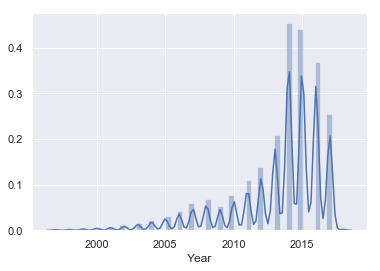

In [117]:
sns.distplot(data_no_mv['Year'])

In [118]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year'] > q]
data_3.describe(include='all')

,Price,Year,Mileage,City,State,Make
count,826445.000000,826445.000000,826445.000000,826445,826445,826445
unique,NaN,NaN,NaN,2553,59,50
top,NaN,NaN,NaN,Houston,TX,Ford
freq,NaN,NaN,NaN,12255,91662,106913
mean,21021.346747,2013.492401,50417.303189,NaN,NaN,NaN
std,10484.533207,3.047032,36839.105093,NaN,NaN,NaN
min,1500.000000,2003.000000,5.000000,NaN,NaN,NaN
25%,13495.000000,2012.000000,23851.000000,NaN,NaN,NaN
50%,18598.000000,2014.000000,39903.000000,NaN,NaN,NaN
75%,26990.000000,2016.000000,70125.000000,NaN,NaN,NaN


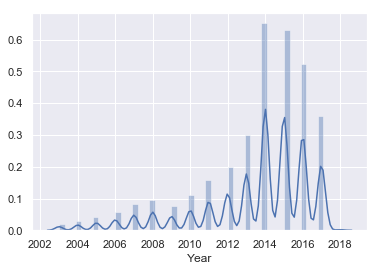

In [119]:
sns.distplot(data_3['Year'])

In [120]:
data_cleaned = data_3.reset_index(drop = True)

In [121]:
data_cleaned.describe(include='all')

,Price,Year,Mileage,City,State,Make
count,826445.000000,826445.000000,826445.000000,826445,826445,826445
unique,NaN,NaN,NaN,2553,59,50
top,NaN,NaN,NaN,Houston,TX,Ford
freq,NaN,NaN,NaN,12255,91662,106913
mean,21021.346747,2013.492401,50417.303189,NaN,NaN,NaN
std,10484.533207,3.047032,36839.105093,NaN,NaN,NaN
min,1500.000000,2003.000000,5.000000,NaN,NaN,NaN
25%,13495.000000,2012.000000,23851.000000,NaN,NaN,NaN
50%,18598.000000,2014.000000,39903.000000,NaN,NaN,NaN
75%,26990.000000,2016.000000,70125.000000,NaN,NaN,NaN


## Checking the OLS assumptions

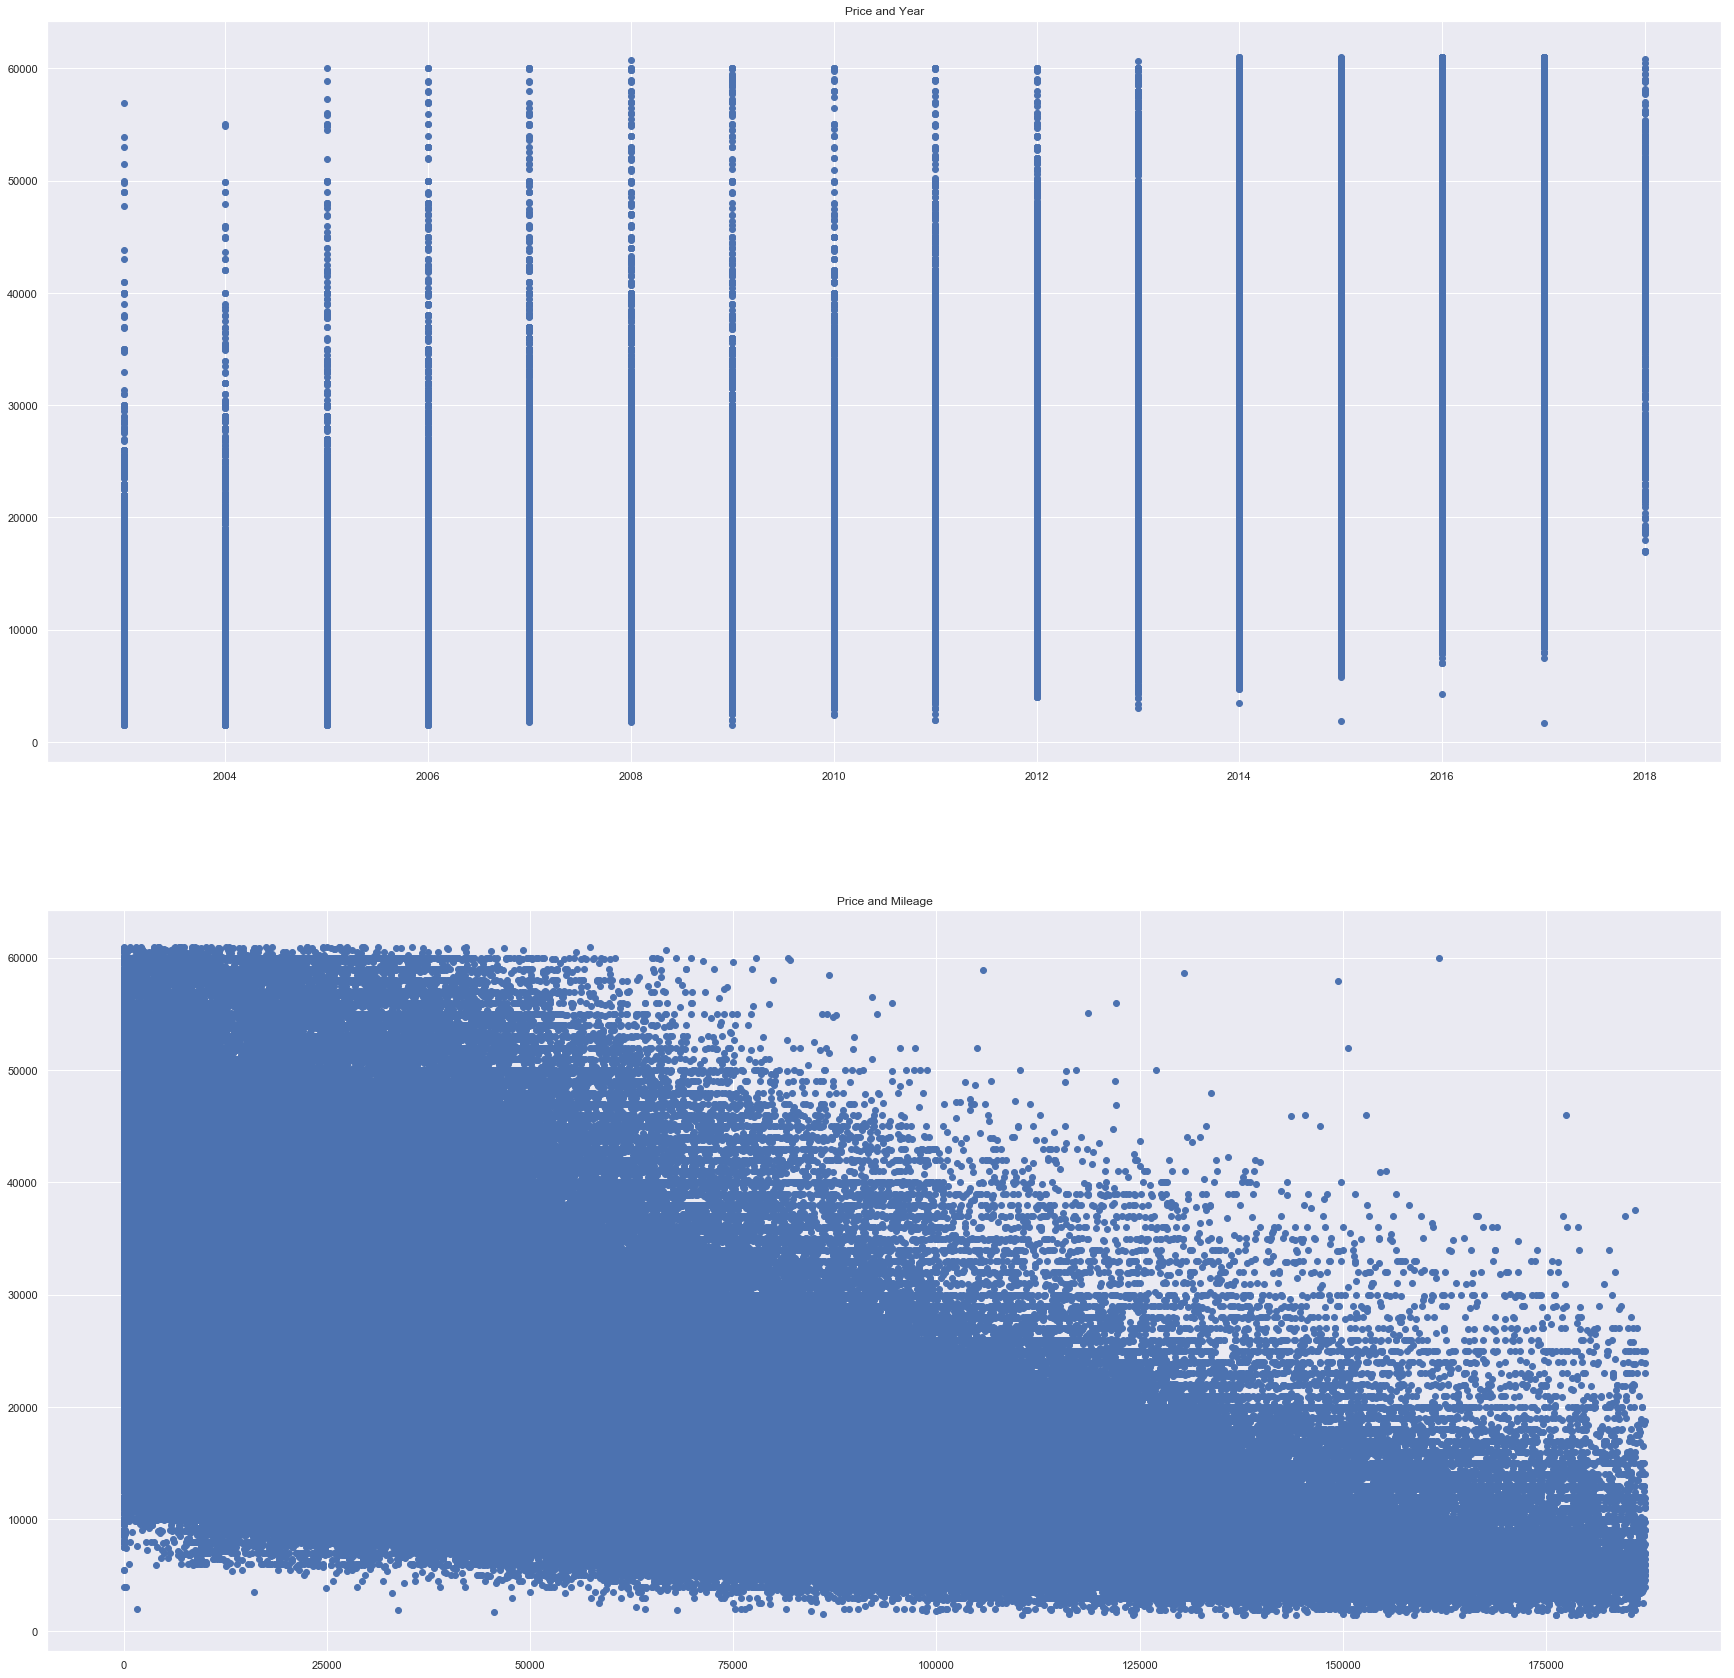

In [122]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(30, 30))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price and Mileage')

plt.show()

Graphs kind of look like an exponential relationship which wouldn't fit for Linear Regression, so I'll use a logarithmic transformation to make the data look linear.

In [123]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Price,Year,Mileage,City,State,Make,log_price
0,8995,2014,35725,El Paso,TX,Acura,9.104424
1,10888,2013,19606,Long Island City,NY,Acura,9.295417
2,8995,2013,48851,El Paso,TX,Acura,9.104424
3,10999,2014,39922,Windsor,CO,Acura,9.305560
4,14799,2016,22142,Lindon,UT,Acura,9.602315
5,7989,2012,105246,Miami,FL,Acura,8.985821
6,14490,2014,34032,Greatneck,NY,Acura,9.581214
7,13995,2013,32384,West Jordan,UT,Acura,9.546455
8,10495,2013,57596,Waterbury,CT,Acura,9.258654
9,9995,2013,63887,El Paso,TX,Acura,9.209840


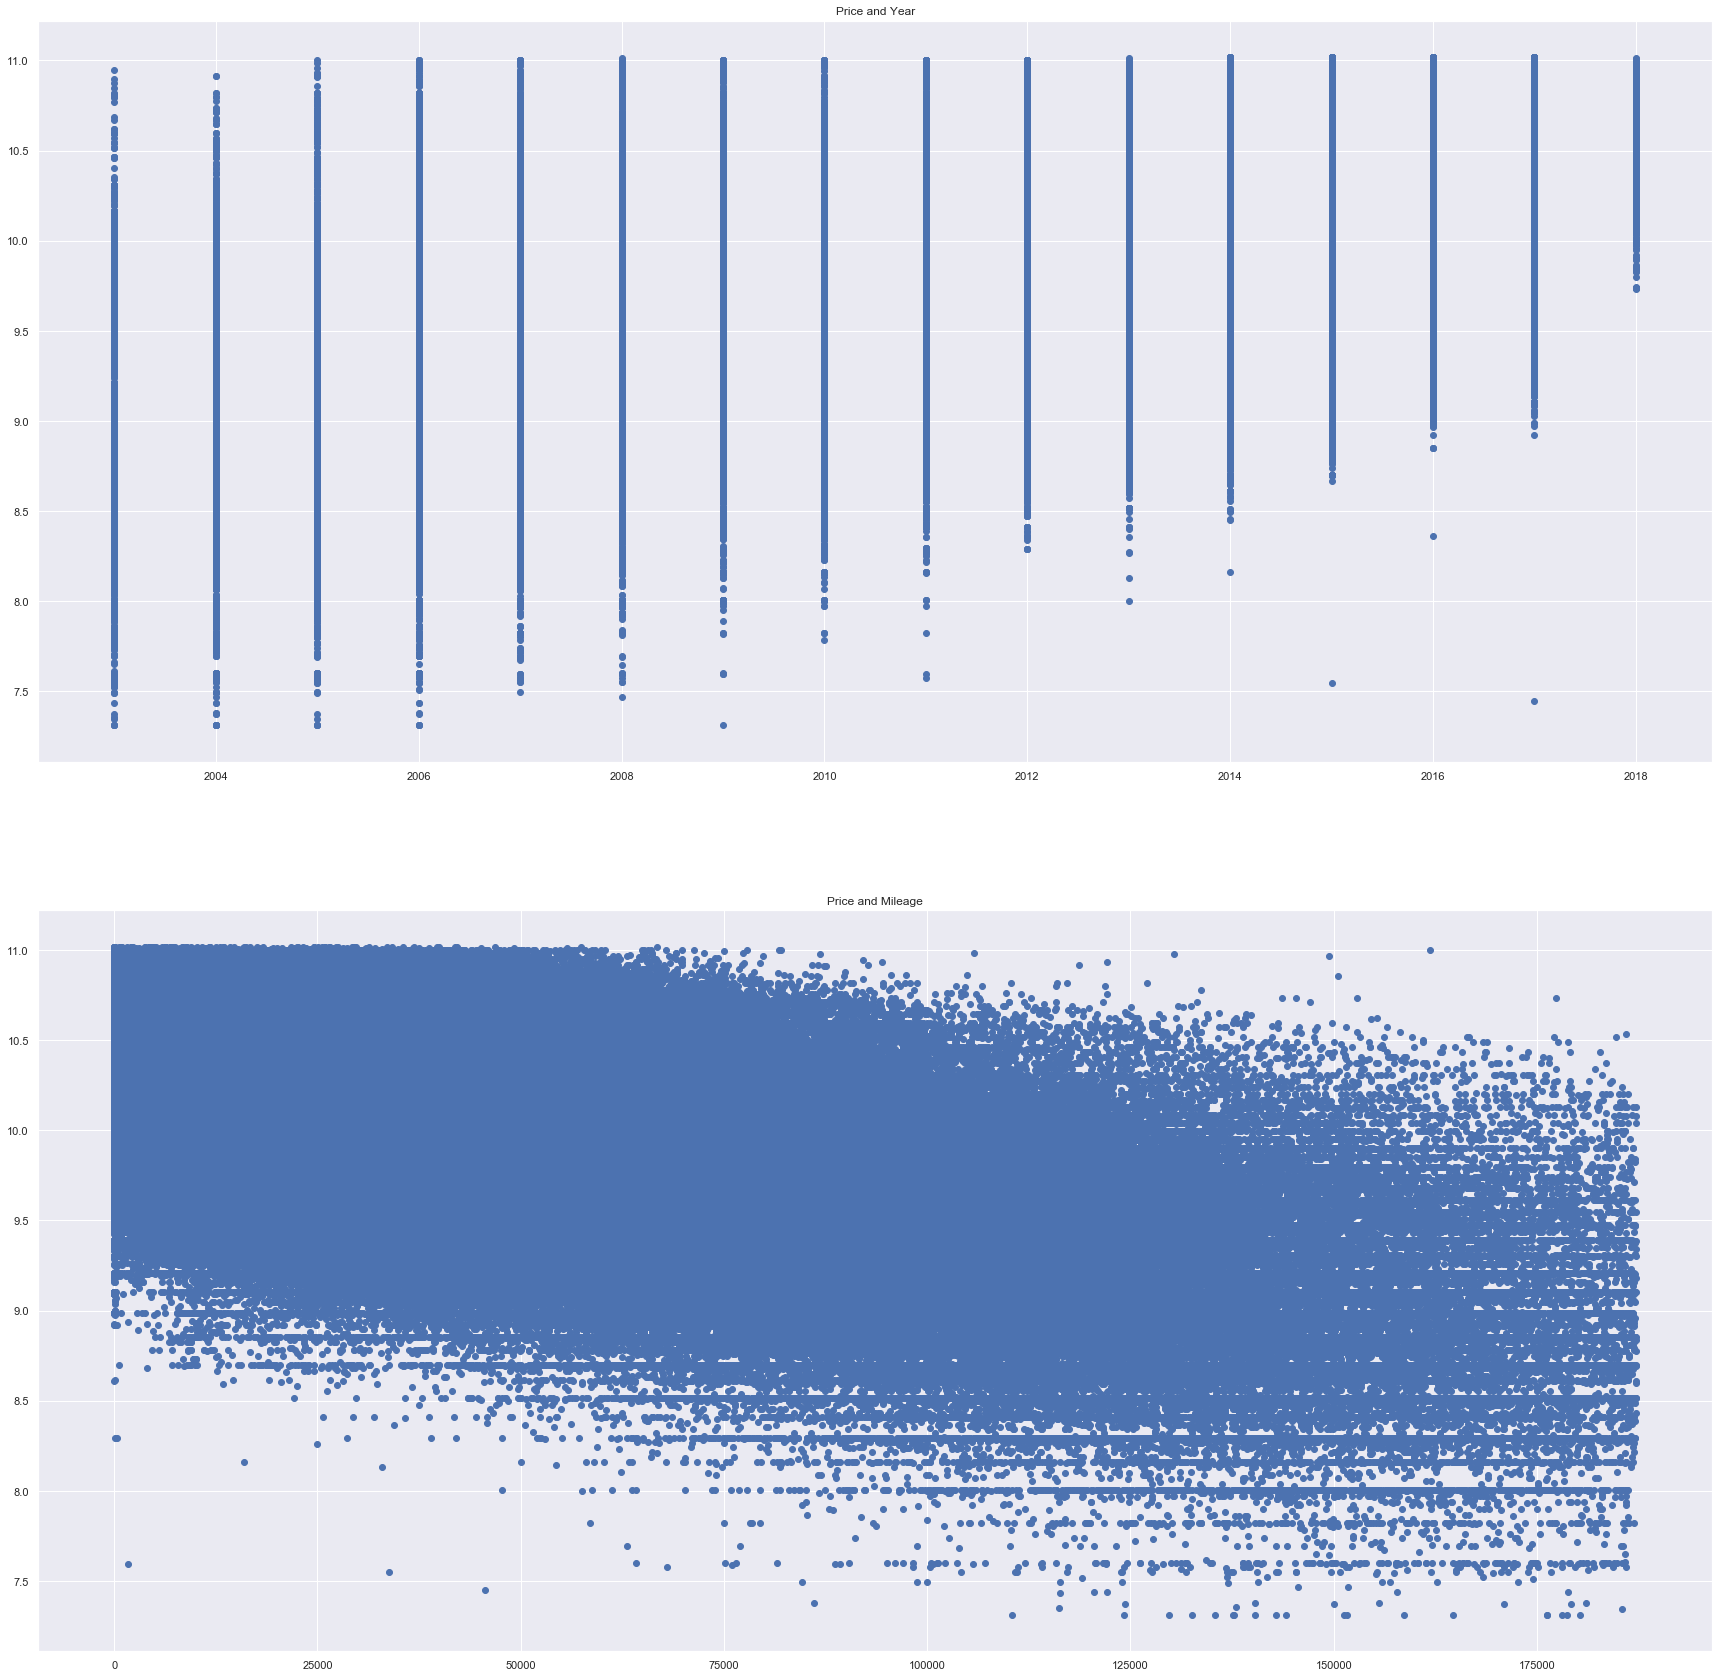

In [124]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(30, 30))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title('Price and Mileage')

plt.show()

In [125]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

Checking for multicollinearity

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [127]:
vif

,VIF,features
0,2.863709,Mileage
1,2.863709,Year


With a VIF less than 5, it shows that the variables should have no multicollinearity.

### Standardization

In [128]:
scaled_features = data_cleaned.copy()
scaled_features.head()

,Year,Mileage,City,State,Make,log_price
0,2014,35725,El Paso,TX,Acura,9.104424
1,2013,19606,Long Island City,NY,Acura,9.295417
2,2013,48851,El Paso,TX,Acura,9.104424
3,2014,39922,Windsor,CO,Acura,9.305560
4,2016,22142,Lindon,UT,Acura,9.602315


In [129]:
exclude_scale = ['Year', 'Mileage']
features = scaled_features[exclude_scale]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
features = scaler.transform(features)

C:\Users\jonat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [131]:
scaled_features[exclude_scale] = features
scaled_features.head()

,Year,Mileage,City,State,Make,log_price
0,0.166588,-0.398824,El Paso,TX,Acura,9.104424
1,-0.161600,-0.836375,Long Island City,NY,Acura,9.295417
2,-0.161600,-0.042517,El Paso,TX,Acura,9.104424
3,0.166588,-0.284896,Windsor,CO,Acura,9.305560
4,0.822965,-0.767535,Lindon,UT,Acura,9.602315


## Create dummy variables

In [132]:
data_with_dummies = pd.get_dummies(scaled_features, drop_first=True)

In [133]:
data_with_dummies.head()

,Year,Mileage,log_price,City_ALEXANDRIA,City_AURORA,City_AUSTIN,City_AVON,City_Abbeville,City_Aberdeen,City_Abilene,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
0,0.166588,-0.398824,9.104424,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.161600,-0.836375,9.295417,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.161600,-0.042517,9.104424,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.166588,-0.284896,9.305560,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.822965,-0.767535,9.602315,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression Model

In [134]:
data_preprocessed = data_with_dummies
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Train Test Split

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, random_state=365)

### Create the Regression

In [136]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
y_hat = reg.predict(x_train)

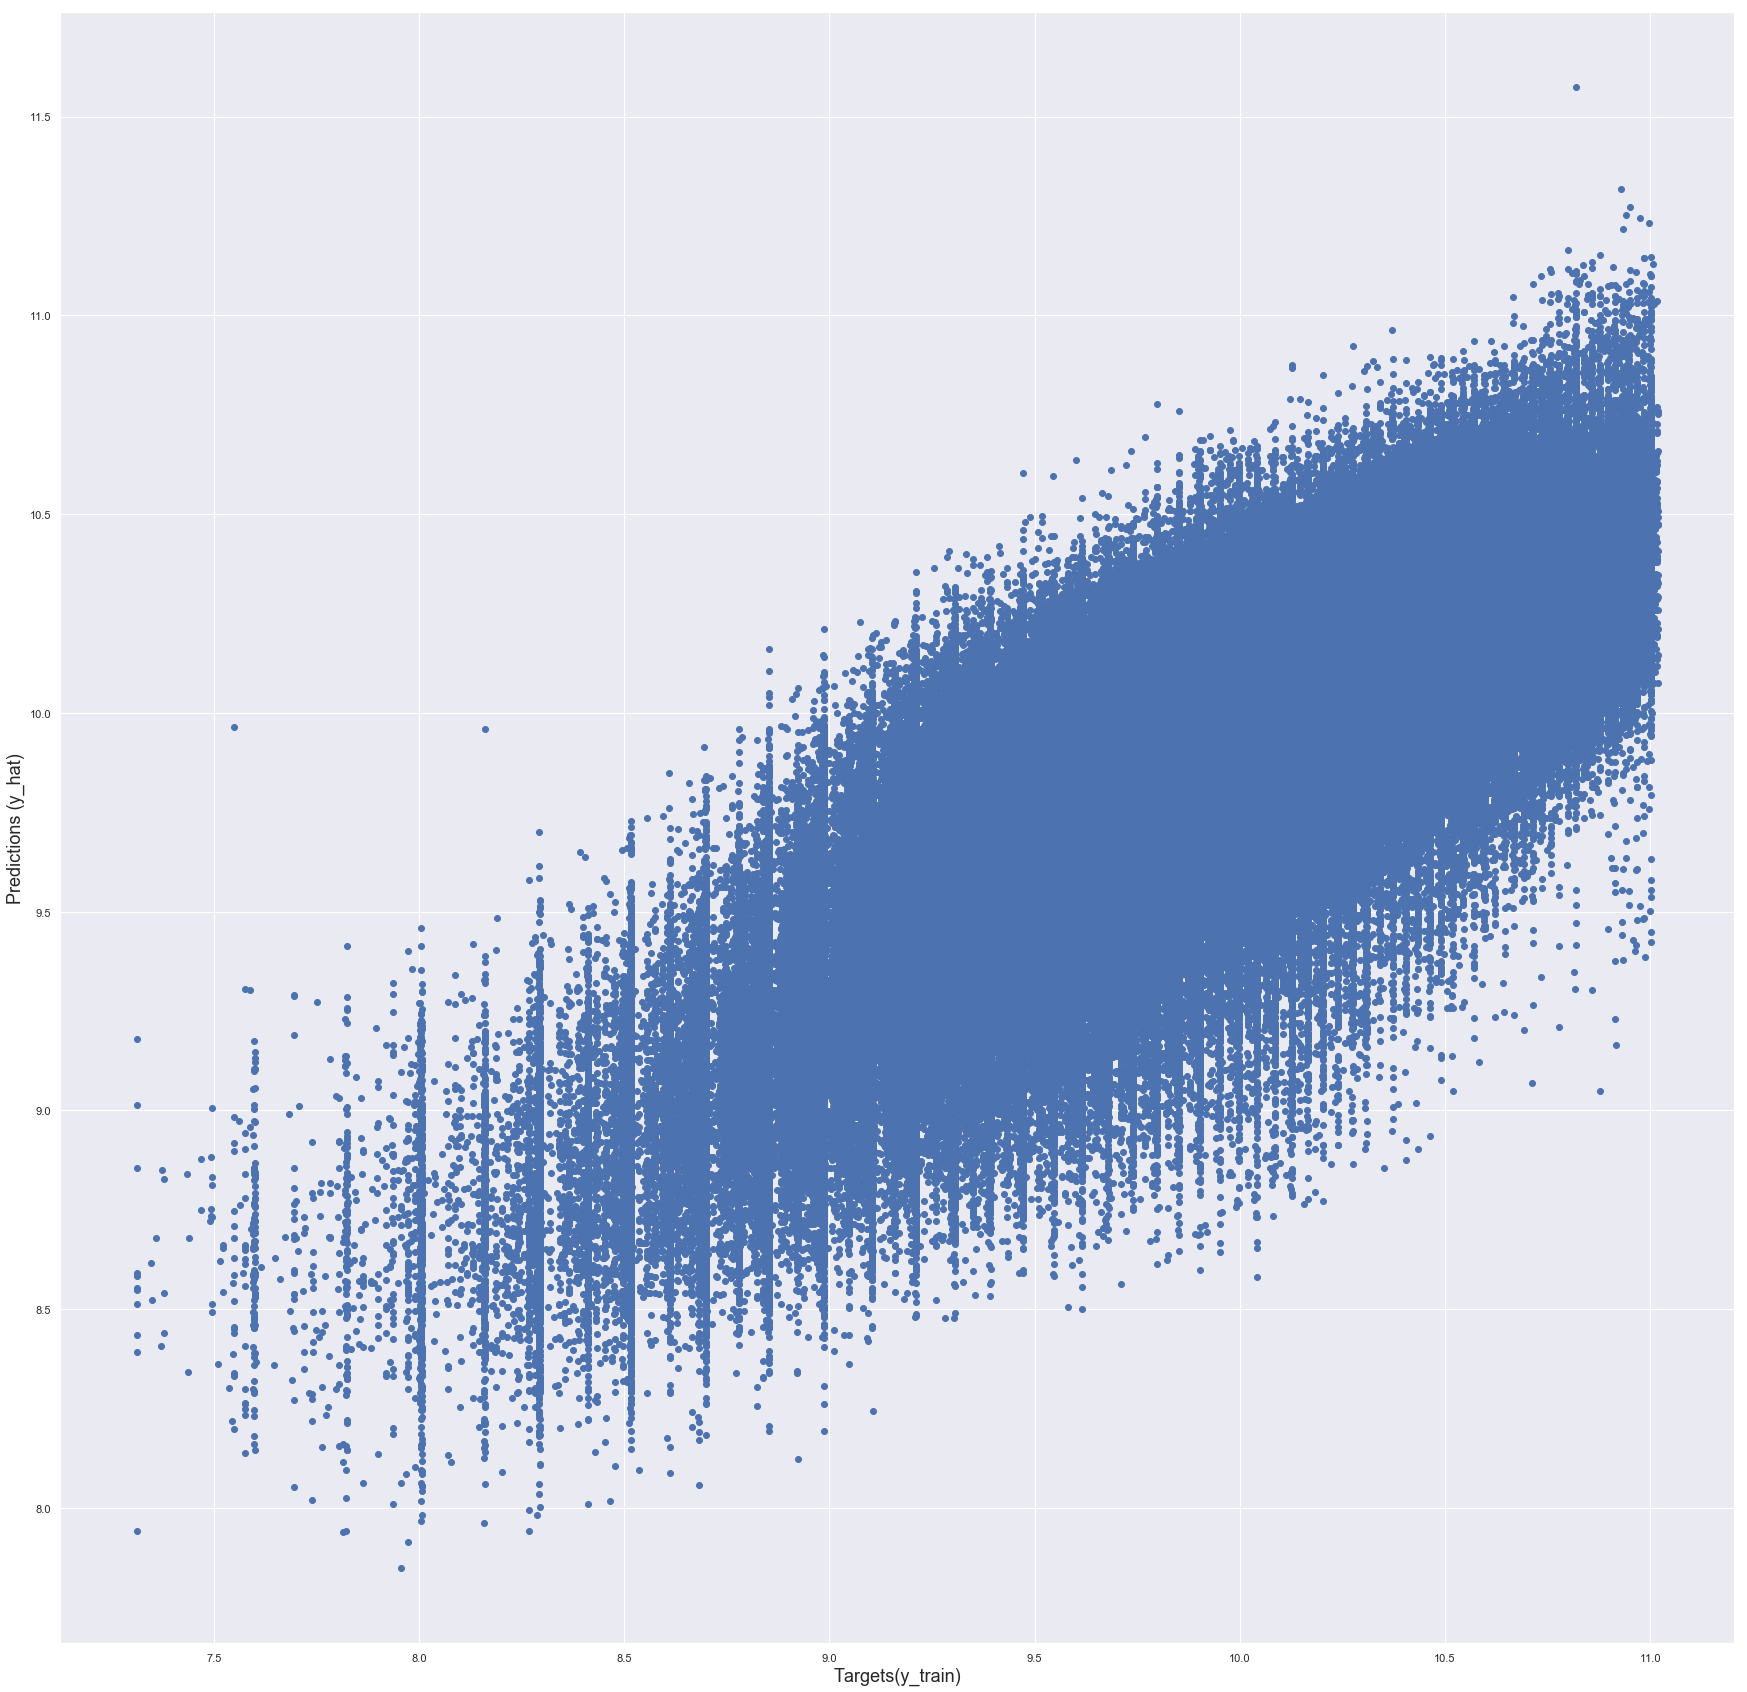

In [138]:
plt.subplots(1, 1, sharey=True, figsize=(30, 30))
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

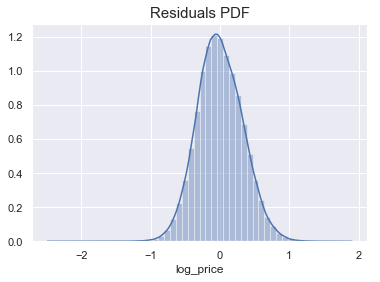

In [139]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 15)

The distribution seems fairly balanced with slight overestimations at the negative side.

In [140]:
reg.score(x_train, y_train)

0.5919513086203092

Model captures almost 60% of the data (R-squared) which should be good enough considering the size and the variability of the dataset to the price.

### Finding the weights and bias

In [141]:
reg.intercept_

4409843131.984476

In [142]:
reg.coef_

array([ 0.19115204, -0.14847362, -0.08794433, ..., -0.46922984,
       -0.0491854 , -1.15676213])

In [143]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Year,1.911520e-01
1,Mileage,-1.484736e-01
2,City_ALEXANDRIA,-8.794433e-02
3,City_AURORA,-2.715827e-02
4,City_AUSTIN,-1.457307e-01
5,City_AVON,2.478357e-01
6,City_Abbeville,8.011809e-02
7,City_Aberdeen,-2.106465e-01
8,City_Abilene,4.718225e-02
9,City_Abington,-1.272486e-01


FOR CONTINIOUS Variables: A positive weight would show that as the feature increases in value, so does the log_price or the 'Price' respectively and a negative weight would show the opposite.

For DUMMY variables: A positive weight would show that the respective category is more expensive than the benchmark (in this case the benchmark for car brand is Acura and city is Akron since both were removed after the data was converted to dummy variables) and a negative weight would mean the opposite.

### Testing

In [144]:
y_hat_test = reg.predict(x_test)

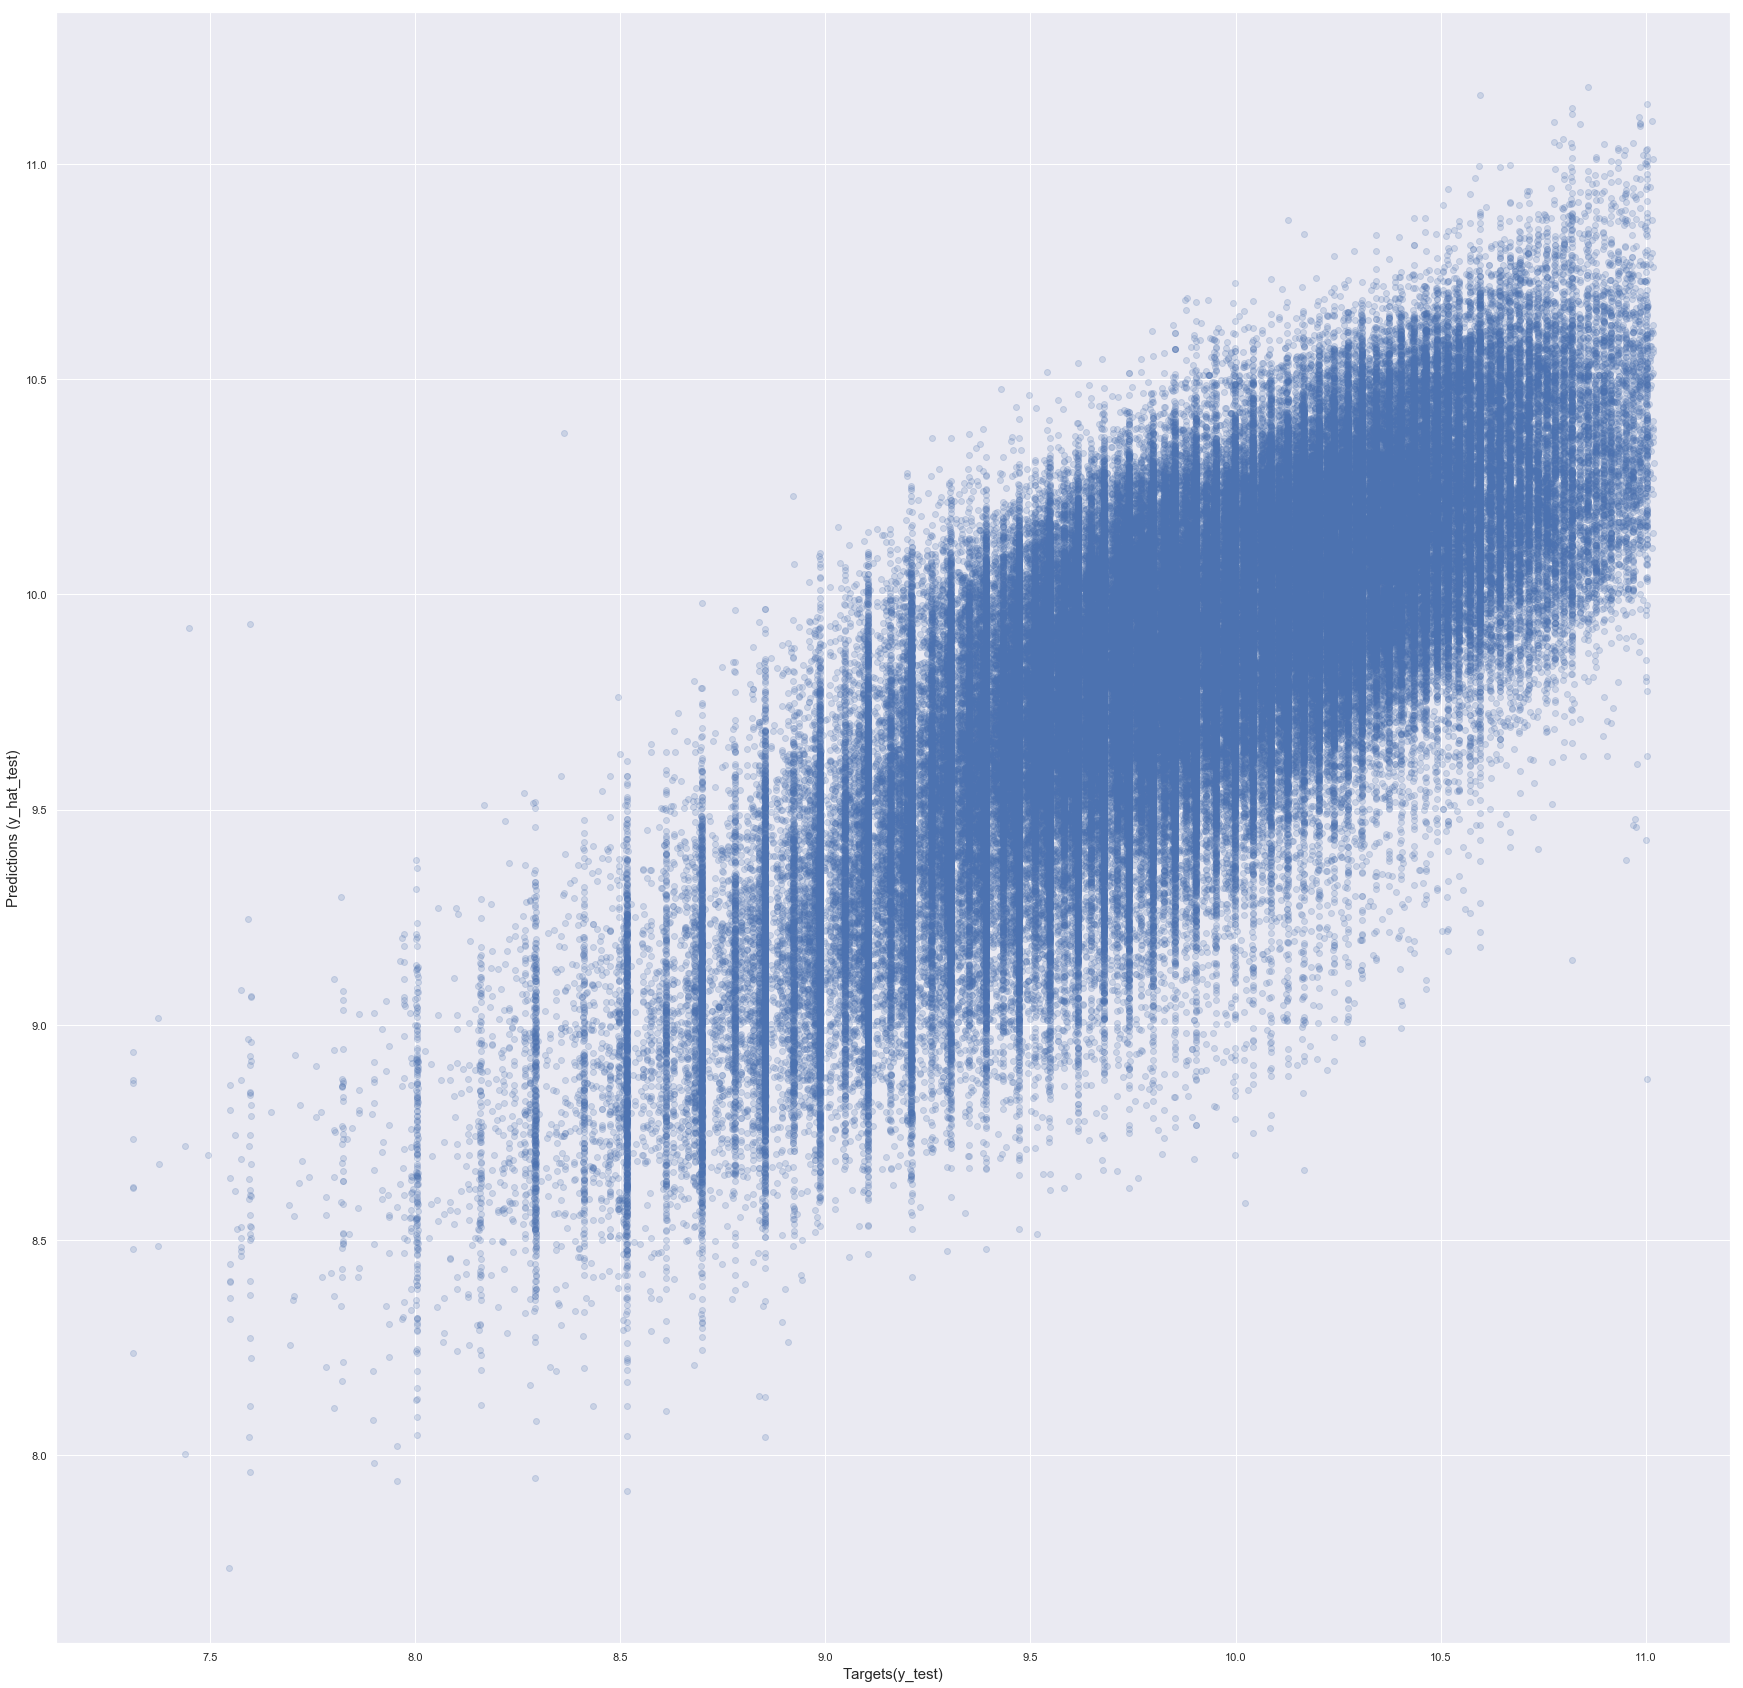

In [145]:
plt.subplots(1, 1, sharey=True, figsize=(30, 30))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)', size=15)
plt.ylabel('Predictions (y_hat_test)', size=15)
plt.show()

In [147]:
y_test = y_test.reset_index(drop=True)

df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)
df_pf.head()

,Predictions,Target,Residual,Difference%
0,28378.347719,24000.0,-4378.347719,18.243115
1,26467.754023,38251.0,11783.245977,30.805066
2,13674.130885,17788.0,4113.869115,23.127216
3,7634.236527,7995.0,360.763473,4.512364
4,17085.379135,12950.0,-4135.379135,31.933430


In [148]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,206612.000000,206612.000000,206612.000000,206612.000000
mean,19965.192114,21027.299765,1062.107651,26.995242
std,7355.367751,10489.009841,7264.139793,23.136742
min,2291.247464,1500.000000,-30212.707467,0.000021
25%,14860.734387,13495.000000,-3587.810564,10.635576
50%,19384.676449,18599.000000,-221.549266,22.225906
75%,24338.126575,26990.000000,4616.591175,36.957519
max,71560.189219,60986.000000,52849.657108,1086.077120


In [149]:
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
194654,22778.995298,22779.0,0.004702,0.000021
162263,25995.010753,25995.0,-0.010753,0.000041
77872,14950.017746,14950.0,-0.017746,0.000119
9588,29979.569383,29980.0,0.430617,0.001436
12217,23550.338780,23550.0,-0.338780,0.001439
167094,7988.115423,7988.0,-0.115423,0.001445
87994,13990.796169,13991.0,0.203831,0.001457
140273,8987.808653,8988.0,0.191347,0.002129
194273,5995.170383,5995.0,-0.170383,0.002842
125991,18023.449514,18024.0,0.550486,0.003054
